In [328]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [148]:
import matplotlib.pyplot as plt

from matplotlib import font_manager

font_fname = 'C:/Windows/Fonts/malgun.ttf'

font_family = font_manager.FontProperties(fname=font_fname).get_name()

plt.rcParams["font.family"] = font_family

### 전처리

In [615]:
data = pd.read_csv('review.csv', encoding='utf-8')
data

,text,emotion
0,메뉴는 흠잡을 데 없이 좋았어요\n고기의 질도 좋고 굽기도 잘 굽고 불향도 잘 입혀...,맛있다
1,주말 저녁 방문.\n\n자주 뵙는 의사 선생님이 알고보니 같은 동네에 사셔서 상담 ...,맛있다
2,특색을 찾기는 어렵지만 그럭저럭 괜찮은 음식을 낸다 지하의 공간이 제법 비좁지만 유...,괜찮다
3,고기요리 도마와 시푸드 마린으로 나뉘어있었지만 이곳에서 모두 주문이 가능하다고.\n...,맛있다
4,도마 매장 리뉴얼중이라서 마린에서 식사했는데 샐러드 파스타 스테이크 모두 맛있었어요,맛있다
...,...,...
15428,태국음식 너무 좋아하는데 집근처에 생겼다는 말 듣고 방문했었는데 그뒤로 단골돼서 친...,맛있다
15429,맛있긴한데 잘 시켜야될 것 같아요.\n팟타이와 쏨땀은 괜찮았는데\n\n뿌빳뽕커리는 ...,맛있다
15430,"Um,,,not exactly same taste like when i ate at...",괜찮다
15431,"best thai in Seoul hands down, and better than...",맛있다


In [743]:
data.emotion.value_counts()

1    11891
0     3419
Name: emotion, dtype: int64

In [616]:
for i in range(len(data)):
    if data['emotion'][i] == '맛있다':
        data['emotion'][i] = 1
    else:
        data['emotion'][i] = 0
data

,text,emotion
0,메뉴는 흠잡을 데 없이 좋았어요\n고기의 질도 좋고 굽기도 잘 굽고 불향도 잘 입혀...,1
1,주말 저녁 방문.\n\n자주 뵙는 의사 선생님이 알고보니 같은 동네에 사셔서 상담 ...,1
2,특색을 찾기는 어렵지만 그럭저럭 괜찮은 음식을 낸다 지하의 공간이 제법 비좁지만 유...,0
3,고기요리 도마와 시푸드 마린으로 나뉘어있었지만 이곳에서 모두 주문이 가능하다고.\n...,1
4,도마 매장 리뉴얼중이라서 마린에서 식사했는데 샐러드 파스타 스테이크 모두 맛있었어요,1
...,...,...
15428,태국음식 너무 좋아하는데 집근처에 생겼다는 말 듣고 방문했었는데 그뒤로 단골돼서 친...,1
15429,맛있긴한데 잘 시켜야될 것 같아요.\n팟타이와 쏨땀은 괜찮았는데\n\n뿌빳뽕커리는 ...,1
15430,"Um,,,not exactly same taste like when i ate at...",0
15431,"best thai in Seoul hands down, and better than...",1


In [617]:
import re
def cleanText(readData):
    text = str(readData)
    text = re.sub('[-=+,#/\?:^$.@*\"※~&%ㆍ!』\\‘|\(\)\[\]\<\>`\'…》]', '', text)
    text = re.sub('[ +]', " ", text)
    text = re.sub("\n", " ", text)
    return text
# 특수문자, 다수 공백, 줄바꿈 제거

<>:4: DeprecationWarning: invalid escape sequence \?
<>:4: DeprecationWarning: invalid escape sequence \?
<>:4: DeprecationWarning: invalid escape sequence \?
<ipython-input-617-8a8e0f586c8c>:4: DeprecationWarning: invalid escape sequence \?
  text = re.sub('[-=+,#/\?:^$.@*\"※~&%ㆍ!』\\‘|\(\)\[\]\<\>`\'…》]', '', text)


In [618]:
data['text'] = data['text'].apply(cleanText)
data

,text,emotion
0,메뉴는 흠잡을 데 없이 좋았어요 고기의 질도 좋고 굽기도 잘 굽고 불향도 잘 입혀져...,1
1,주말 저녁 방문 자주 뵙는 의사 선생님이 알고보니 같은 동네에 사셔서 상담 시간에...,1
2,특색을 찾기는 어렵지만 그럭저럭 괜찮은 음식을 낸다 지하의 공간이 제법 비좁지만 유...,0
3,고기요리 도마와 시푸드 마린으로 나뉘어있었지만 이곳에서 모두 주문이 가능하다고 런치...,1
4,도마 매장 리뉴얼중이라서 마린에서 식사했는데 샐러드 파스타 스테이크 모두 맛있었어요,1
...,...,...
15428,태국음식 너무 좋아하는데 집근처에 생겼다는 말 듣고 방문했었는데 그뒤로 단골돼서 친...,1
15429,맛있긴한데 잘 시켜야될 것 같아요 팟타이와 쏨땀은 괜찮았는데 뿌빳뽕커리는 비추합니...,1
15430,Umnot exactly same taste like when i ate at th...,0
15431,best thai in Seoul hands down and better than ...,1


In [619]:
data['emotion']=data['emotion'].astype('int64')

In [620]:
data.fillna('', inplace=True)
for i in range(len(data)):
    if data['text'][i] == '':
        data = data.drop([i],axis=0)

In [621]:
data

,text,emotion
0,메뉴는 흠잡을 데 없이 좋았어요 고기의 질도 좋고 굽기도 잘 굽고 불향도 잘 입혀져...,1
1,주말 저녁 방문 자주 뵙는 의사 선생님이 알고보니 같은 동네에 사셔서 상담 시간에...,1
2,특색을 찾기는 어렵지만 그럭저럭 괜찮은 음식을 낸다 지하의 공간이 제법 비좁지만 유...,0
3,고기요리 도마와 시푸드 마린으로 나뉘어있었지만 이곳에서 모두 주문이 가능하다고 런치...,1
4,도마 매장 리뉴얼중이라서 마린에서 식사했는데 샐러드 파스타 스테이크 모두 맛있었어요,1
...,...,...
15427,똠양꿍은 간이 살짝 강하네요 아마도 향 강한 것 좋아 하시는 분들은 아주 좋아 할 ...,1
15428,태국음식 너무 좋아하는데 집근처에 생겼다는 말 듣고 방문했었는데 그뒤로 단골돼서 친...,1
15429,맛있긴한데 잘 시켜야될 것 같아요 팟타이와 쏨땀은 괜찮았는데 뿌빳뽕커리는 비추합니...,1
15430,Umnot exactly same taste like when i ate at th...,0


### 단어 빈도

In [622]:
from sklearn.feature_extraction.text import CountVectorizer

In [623]:
cv = CountVectorizer(max_features=1000, stop_words=['english','korean','ㅠㅠ','ㅋㅋ','ㅎㅎ','nan'])

In [624]:
tdm = cv.fit_transform(data['text'])

In [625]:
tdm

<15310x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 270254 stored elements in Compressed Sparse Row format>

In [626]:
word_count = pd.DataFrame({
    '단어':cv.get_feature_names(),
    '빈도':tdm.sum(axis=0).flat
})

In [745]:
word_count.sort_values('빈도', ascending=False).head(10)

,단어,빈도
194,너무,5157
813,정말,3979
336,맛이,2773
752,있는,2515
322,많이,2395
867,진짜,2131
223,다른,1985
129,그냥,1923
817,조금,1906
143,그리고,1863


In [628]:
from wordcloud import WordCloud

In [629]:
wc = WordCloud(font_path='font/malgun.ttf',background_color='white', max_words=100, width=400, height=300)

In [630]:
count_dic = word_count.set_index('단어')['빈도'].to_dict()

In [631]:
cloud = wc.fit_words(count_dic)

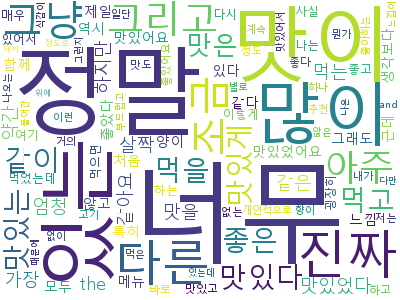

In [632]:
cloud.to_image()

In [633]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [634]:
tfid = TfidfVectorizer(max_features=1000, stop_words=['english','korean','ㅠㅠ','ㅋㅋ','ㅎㅎ','nan'])

In [635]:
tdm_f = tfid.fit_transform(data['text'])

In [636]:
word_count_tdf = pd.DataFrame({
    '단어': tfid.get_feature_names(),
    'tf-idf': tdm_f.sum(axis=0).flat
})

In [637]:
word_count_tdf.sort_values('tf-idf', ascending=False).head(5)

,단어,tf-idf
194,너무,569.881385
813,정말,445.054391
867,진짜,314.733781
347,맛있다,308.200632
352,맛있어요,306.415031


### 감성 분석

In [638]:
#!pip install tensorflow

In [639]:
#!pip install kiwipiepy

In [640]:
from kiwipiepy import Kiwi

kiwi = Kiwi()
kiwi.prepare()

0

In [641]:
def extract_keywords(text):
    result = kiwi.analyze(text)
    for token, pos, _, _ in result[0][0]:
        if pos[0] in 'NV':
            yield f'{token}/{pos}'

In [642]:
list(extract_keywords(data.text[0]))

['메뉴/NNG',
 '흠잡/VV',
 '데/NNB',
 '좋/VA',
 '고기/NNG',
 '질/NNG',
 '좋/VA',
 '굽/VV',
 '굽/VV',
 '불향/NNG',
 '입히/VV',
 '지/VX',
 '육/NR',
 '즙/NNG',
 '맛있/VA',
 '먹/VV',
 '일행/NNG',
 '말/NNG',
 '나누/VV',
 '어렵/VA',
 '만큼/NNB',
 '음식/NNG',
 '맛/NNG',
 '빠지/VV',
 '먹/VV',
 '메뉴/NNG',
 '구성/NNG',
 '좋/VA',
 '음료수/NNG',
 '하나/NR',
 '시키/VV',
 '세트/NNG',
 '메뉴/NNG',
 '먹/VV',
 '부족/NNG',
 '없/VA',
 '리조또/NNP',
 '개발/NNG',
 '것/NNB',
 '같/VA',
 '건강/NNG',
 '맛있/VA',
 '맛/NNG',
 '이/VCP',
 '샐러드/NNG',
 '요리/NNG',
 '어우러지/VV',
 '기분/NNG',
 '좋/VA',
 '식사/NNG',
 '이/VCP',
 '분위기/NNG',
 '예약/NNG',
 '이/VCP',
 '번잡/NNG',
 '않/VX',
 '내/VV',
 '친절/NNG',
 '조명/NNG',
 '좋/VA']

In [643]:
cv = CountVectorizer(max_features=1000, tokenizer=extract_keywords)
dtm = cv.fit_transform(data['text'])

In [644]:
from sklearn.feature_extraction.text import TfidfTransformer
trans = TfidfTransformer()
dtm2 = trans.fit_transform(dtm)

In [645]:
words = cv.get_feature_names()

In [646]:
import joblib
joblib.dump({'words': words, 'dtm': dtm, 'dtm2': dtm2}, 'text.pkl')

['text.pkl']

In [647]:
text = joblib.load('text.pkl')
locals().update(data)

In [648]:
type(data.emotion.values)

numpy.ndarray

In [649]:
from sklearn.model_selection import train_test_split

In [650]:
x = dtm
y = data.emotion.values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1234)

### 로지스틱 회귀분석

In [651]:
import tensorflow as tf

In [652]:
model_logi = tf.keras.models.Sequential()
model_logi.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [653]:
model_logi.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [655]:
model_logi.fit(x_train.A, y_train, epochs=100, validation_split=0.1,
          callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_accuracy')])

Epoch 1/100
345/345 [==============================] - 1s 1ms/step - loss: 0.5988 - accuracy: 0.7293 - val_loss: 0.4928 - val_accuracy: 0.7943
Epoch 2/100
345/345 [==============================] - 0s 1ms/step - loss: 0.4826 - accuracy: 0.8032 - val_loss: 0.4480 - val_accuracy: 0.8114
Epoch 3/100
345/345 [==============================] - 0s 1ms/step - loss: 0.4373 - accuracy: 0.8139 - val_loss: 0.4267 - val_accuracy: 0.8188
Epoch 4/100
345/345 [==============================] - 0s 994us/step - loss: 0.4179 - accuracy: 0.8225 - val_loss: 0.4145 - val_accuracy: 0.8188


In [656]:
model_logi.evaluate(x_test.A, y_test)

96/96 [==============================] - 0s 735us/step - loss: 0.4247 - accuracy: 0.8093


[0.42465609312057495, 0.8092749714851379]

### 추가 분석

In [747]:
model_logi.compile(optimizer='adam', loss='binary_crossentropy', metrics=['mse'])
model_logi.fit(x_train.A, y_train, epochs=100, validation_split=0.1,
          callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_accuracy')])
model_logi.evaluate(x_test.A, y_test)

Epoch 1/100
345/345 [==============================] - 1s 1ms/step - loss: 0.3695 - mse: 0.1154 - val_loss: 0.4046 - val_mse: 0.1261
Epoch 2/100
345/345 [==============================] - 0s 1ms/step - loss: 0.3696 - mse: 0.1162 - val_loss: 0.4054 - val_mse: 0.1263
Epoch 3/100
345/345 [==============================] - 0s 841us/step - loss: 0.3670 - mse: 0.1146 - val_loss: 0.4052 - val_mse: 0.1259
Epoch 4/100
345/345 [==============================] - 0s 934us/step - loss: 0.3606 - mse: 0.1125 - val_loss: 0.4057 - val_mse: 0.1260
Epoch 5/100
345/345 [==============================] - 0s 905us/step - loss: 0.3523 - mse: 0.1094 - val_loss: 0.4066 - val_mse: 0.1264
Epoch 6/100
345/345 [==============================] - 0s 994us/step - loss: 0.3542 - mse: 0.1102 - val_loss: 0.4079 - val_mse: 0.1268 0s - loss: 0.3537 - mse: 0.110
Epoch 7/100
345/345 [==============================] - 0s 1ms/step - loss: 0.3647 - mse: 0.1134 - val_loss: 0.4088 - val_mse: 0.1269
Epoch 8/100
345/345 [=========

Epoch 60/100
345/345 [==============================] - 0s 1ms/step - loss: 0.3436 - mse: 0.1075 - val_loss: 0.4480 - val_mse: 0.1351
Epoch 61/100
345/345 [==============================] - 0s 948us/step - loss: 0.3441 - mse: 0.1076 - val_loss: 0.4505 - val_mse: 0.1359
Epoch 62/100
345/345 [==============================] - 0s 971us/step - loss: 0.3423 - mse: 0.1067 - val_loss: 0.4481 - val_mse: 0.1352
Epoch 63/100
345/345 [==============================] - 0s 1ms/step - loss: 0.3518 - mse: 0.1107 - val_loss: 0.4490 - val_mse: 0.1353
Epoch 64/100
345/345 [==============================] - 0s 1ms/step - loss: 0.3459 - mse: 0.1074 - val_loss: 0.4462 - val_mse: 0.1344
Epoch 65/100
345/345 [==============================] - 0s 922us/step - loss: 0.3459 - mse: 0.1084 - val_loss: 0.4496 - val_mse: 0.1356
Epoch 66/100
345/345 [==============================] - 0s 963us/step - loss: 0.3333 - mse: 0.1035 - val_loss: 0.4480 - val_mse: 0.1349
Epoch 67/100
345/345 [==============================] 

Epoch 89/100
345/345 [==============================] - 0s 896us/step - loss: 0.3518 - mse: 0.1101 - val_loss: 0.4595 - val_mse: 0.1373
Epoch 90/100
345/345 [==============================] - 0s 968us/step - loss: 0.3395 - mse: 0.1059 - val_loss: 0.4569 - val_mse: 0.1365
Epoch 91/100
345/345 [==============================] - 0s 997us/step - loss: 0.3535 - mse: 0.1102 - val_loss: 0.4567 - val_mse: 0.1364
Epoch 92/100
345/345 [==============================] - 0s 931us/step - loss: 0.3335 - mse: 0.1033 - val_loss: 0.4595 - val_mse: 0.1372
Epoch 93/100
345/345 [==============================] - 0s 1ms/step - loss: 0.3397 - mse: 0.1045 - val_loss: 0.4571 - val_mse: 0.1364
Epoch 94/100
345/345 [==============================] - 0s 983us/step - loss: 0.3374 - mse: 0.1042 - val_loss: 0.4601 - val_mse: 0.1374
Epoch 95/100
345/345 [==============================] - 0s 986us/step - loss: 0.3391 - mse: 0.1059 - val_loss: 0.4590 - val_mse: 0.1370
Epoch 96/100
345/345 [============================

[0.4859625995159149, 0.1424737423658371]

In [748]:
model_logi.compile(optimizer='Adagrad', loss='binary_crossentropy', metrics=['accuracy'])
model_logi.fit(x_train.A, y_train, epochs=100, validation_split=0.1,
          callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_accuracy')])
model_logi.evaluate(x_test.A, y_test)

Epoch 1/100
345/345 [==============================] - 1s 1ms/step - loss: 0.3400 - accuracy: 0.8542 - val_loss: 0.4605 - val_accuracy: 0.8098
Epoch 2/100
96/96 [==============================] - 0s 693us/step - loss: 0.4857 - accuracy: 0.8165


[0.48569732904434204, 0.8164598345756531]

In [740]:
model_logi.compile(optimizer='Adamax', loss='binary_crossentropy', metrics=['accuracy'])
model_logi.fit(x_train.A, y_train, epochs=100, validation_split=0.1,
          callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_accuracy')])
model_logi.evaluate(x_test.A, y_test)

Epoch 1/100
345/345 [==============================] - 1s 1ms/step - loss: 0.3902 - accuracy: 0.8292 - val_loss: 0.4054 - val_accuracy: 0.8220
Epoch 2/100
96/96 [==============================] - 0s 602us/step - loss: 0.4155 - accuracy: 0.8171


[0.4155186414718628, 0.8171129822731018]

In [749]:
model_logi.compile(optimizer='Ftrl', loss='binary_crossentropy', metrics=['accuracy'])
model_logi.fit(x_train.A, y_train, epochs=100, validation_split=0.1,
          callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_accuracy')])
model_logi.evaluate(x_test.A, y_test)

Epoch 1/100
345/345 [==============================] - 1s 1ms/step - loss: 0.6325 - accuracy: 0.7764 - val_loss: 0.5882 - val_accuracy: 0.7763
Epoch 2/100
96/96 [==============================] - 0s 829us/step - loss: 0.5876 - accuracy: 0.7799


[0.587583601474762, 0.7798824310302734]

In [751]:
model_logi.compile(optimizer='SGD', loss='binary_crossentropy', metrics=['accuracy'])
model_logi.fit(x_train.A, y_train, epochs=100, validation_split=0.1,
          callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_accuracy')])
model_logi.evaluate(x_test.A, y_test)

Epoch 1/100
345/345 [==============================] - 1s 1ms/step - loss: 0.4381 - accuracy: 0.8073 - val_loss: 0.4365 - val_accuracy: 0.7967
Epoch 2/100
345/345 [==============================] - 0s 913us/step - loss: 0.4338 - accuracy: 0.8073 - val_loss: 0.4333 - val_accuracy: 0.8000
Epoch 3/100
96/96 [==============================] - 0s 651us/step - loss: 0.4368 - accuracy: 0.8018


[0.4367784559726715, 0.8017635345458984]

### 가중치 분석

In [657]:
w, b = model_logi.weights

In [658]:
word_sent = pd.DataFrame({'토큰': words, '가중치': w.numpy().flat})

In [659]:
word_sent.sort_values('가중치').head()

,토큰,가중치
542,실망/NNG,-0.459266
112,기대/NNG,-0.401115
85,괜찮/VA,-0.358708
145,나쁘/VA,-0.330928
311,맛없/VA,-0.290488


In [660]:
word_sent.sort_values('가중치').tail()

,토큰,가중치
825,짱/NNG,0.382043
854,추/NNG,0.409751
38,강/NNP,0.426076
957,하나하나/NNG,0.466450
852,최고/NNG,0.616361


### 주제 분석

In [661]:
cv = CountVectorizer(max_features=1000, stop_words=['english','korean','ㅠㅠ','ㅋㅋ','ㅎㅎ','nan'])

In [662]:
tfid = TfidfVectorizer(max_features=1000, stop_words=['english','korean','ㅠㅠ','ㅋㅋ','ㅎㅎ','nan'])

In [663]:
# cv, words
# tfidf, words_tfid
x_1 = cv.fit_transform(data.text)
x_2 = tfid.fit_transform(data.text)

In [664]:
words_cv = cv.get_feature_names()

In [665]:
words_tfid = tfid.get_feature_names()

In [666]:
from sklearn.decomposition import TruncatedSVD

In [755]:
svd_1 = TruncatedSVD(n_components=3, random_state=1234)
svd_2 = TruncatedSVD(n_components=5, random_state=1234)

In [756]:
svd_1.fit(x_1)

TruncatedSVD(algorithm='randomized', n_components=3, n_iter=5,
             random_state=1234, tol=0.0)

In [757]:
svd_2.fit(x_2)

TruncatedSVD(algorithm='randomized', n_components=5, n_iter=5,
             random_state=1234, tol=0.0)

In [758]:
word_idx_cv = words_cv.index('혼자')
word_idx_tfid = words_tfid.index('혼자')

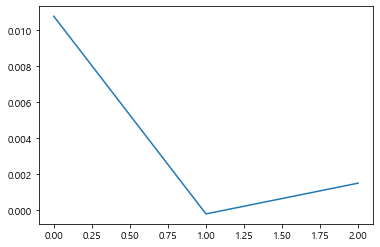

In [770]:
from matplotlib import pyplot
pyplot.plot(svd_1.components_[:, word_idx_cv])

C:\Users\lucky\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\lucky\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


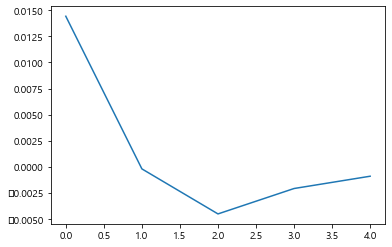

In [771]:
pyplot.plot(svd_2.components_[:, word_idx_tfid])

In [772]:
topic_idx_cv = svd_1.components_[:, word_idx_cv].argmax()
topic_idx_tifd = svd_1.components_[:, word_idx_tfid].argmax()

In [773]:
topic_1 = pd.DataFrame({'word': words_cv, 'loading': svd_1.components_[topic_idx_cv]})
topic_1.sort_values('loading').tail()

,word,loading
322,많이,0.152629
752,있는,0.208633
336,맛이,0.219917
813,정말,0.270538
194,너무,0.309539


In [774]:
topic_2 = pd.DataFrame({'word': words_tfid, 'loading': svd_2.components_[topic_idx_tifd]})
topic_2.sort_values('loading').tail()

,word,loading
322,많이,0.135260
336,맛이,0.142221
867,진짜,0.150772
813,정말,0.228045
194,너무,0.294827


### 병렬 분석

In [676]:
x_1.shape

(15310, 1000)

In [677]:
nrow_cv, ncol_cv = x_1.shape
nrow_tfid, ncol_tfid = x_2.shape

In [678]:
def resample(a):
    return np.random.choice(a, size=nrow)

np.random.seed(1234)
d = np.apply_along_axis(resample, 0, x_1.A)

In [679]:
d.shape

(15433, 1000)

In [680]:
svd2_cv = TruncatedSVD(n_components=100, random_state=1234)
svd2_cv.fit(d)

TruncatedSVD(algorithm='randomized', n_components=100, n_iter=5,
             random_state=1234, tol=0.0)

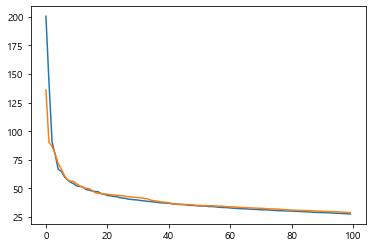

In [681]:
pyplot.plot(svd_1.singular_values_)
pyplot.plot(svd2_cv.singular_values_)

In [682]:
np.argwhere(svd_1.singular_values_ - svd2_cv.singular_values_ <= 0)[0]

array([3], dtype=int64)

In [683]:
d_2 = np.apply_along_axis(resample, 0, x_2.A)

svd2_tfid = TruncatedSVD(n_components=100, random_state=1234)
svd2_tfid.fit(d_2)

np.argwhere(svd_2.singular_values_ - svd2_tfid.singular_values_ <= 0)[0]

array([5], dtype=int64)

### 회전

In [684]:
!pip install factor_analyzer

In [685]:
from factor_analyzer.rotator import Rotator

In [775]:
rotator = Rotator()

In [776]:
rot = rotator.fit_transform(svd_1.components_.T)

In [777]:
loading = rot.T

In [778]:
word_idx = words_cv.index('혼자')

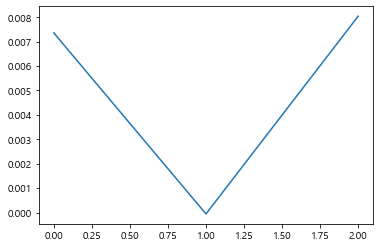

In [785]:
pyplot.plot(loading[:, word_idx_cv])

In [787]:
topic_idx = loading[:, word_idx_cv].argmax()
topic_idx

2

In [786]:
topic = pd.DataFrame({'word': words_cv, 'loading': loading[topic_idx_cv]})
topic.sort_values('loading').tail()

,word,loading
143,그리고,0.120377
322,많이,0.129179
867,진짜,0.179981
813,정말,0.376064
194,너무,0.696882


### NMF

In [789]:
from sklearn.decomposition import NMF
nmf = NMF(n_components=3, random_state=1234)
doc_topics_cv = nmf.fit_transform(x_1)

In [790]:
loading_cv = nmf.components_

In [791]:
word_idx_cv = words_cv.index('혼자')

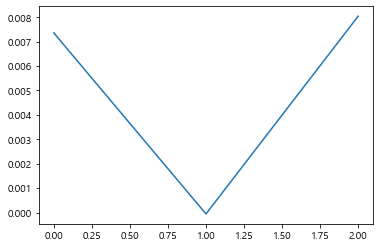

In [792]:
pyplot.plot(loading[:, word_idx_cv])

In [793]:
topic_idx_cv = loading[:, word_idx_cv].argmax()
topic_idx_cv

2

In [794]:
topic = pd.DataFrame({'word': words_cv, 'loading': loading[topic_idx_cv]})
topic.sort_values('loading').tail(10)

,word,loading
493,살짝,0.114239
374,먹는,0.126815
223,다른,0.137790
844,좋은,0.145988
70,같은,0.146668
334,맛을,0.158042
596,아주,0.164898
754,있다,0.173173
336,맛이,0.262859
752,있는,0.345144


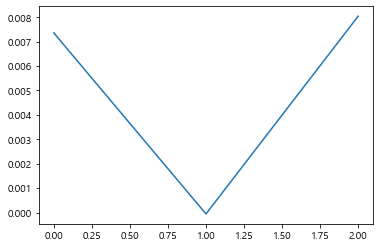

In [795]:
nmf = NMF(n_components=5, random_state=1234)
doc_topics_tfid = nmf.fit_transform(x_2)
loading_tfid = nmf.components_
word_idx_tfid = words_tfid.index('혼자')
pyplot.plot(loading[:, word_idx_tfid])

In [796]:
topic_idx_tfid = loading[:, word_idx_tfid].argmax()
topic_tfid = pd.DataFrame({'word': words_tfid, 'loading': loading[topic_idx_tfid]})
topic_tfid.sort_values('loading').tail(10)

,word,loading
493,살짝,0.114239
374,먹는,0.126815
223,다른,0.137790
844,좋은,0.145988
70,같은,0.146668
334,맛을,0.158042
596,아주,0.164898
754,있다,0.173173
336,맛이,0.262859
752,있는,0.345144


### LDA

In [704]:
#!pip install gensim

In [705]:
from gensim.matutils import Sparse2Corpus

In [706]:
import re
from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS

In [707]:
k_stop = pd.read_csv('korean_stop_words_100.txt', sep='\t')

In [708]:
k_stop_list = k_stop['이']
type(k_stop_list)

pandas.core.series.Series

In [709]:
k_stop = set()

In [710]:
for i in range(len(k_stop_list)):
    k_stop.add(k_stop_list[i])
k_stop.add('ㅋㅋ')
k_stop.add('ㅠㅠ')
k_stop.add('ㅎㅎ')

In [711]:
token_re = re.compile(r'\b\w{2,}\b', re.UNICODE)

def tokenizer(text):
    text = text.lower() # 텍스트를 소문자 변환
    words = []          # 단어 리스트 생성
    for word in token_re.findall(text):
        if word not in [ENGLISH_STOP_WORDS, k_stop]:
            words.append(word)
    return words

In [712]:
docs = []
for text in data.text:
    doc = tokenizer(text)
    docs.append(doc)

In [713]:
from gensim.corpora.dictionary import Dictionary

In [714]:
dic = Dictionary(docs)

In [715]:
dic.filter_extremes(no_below=10, no_above=0.9)

In [716]:
corpus = []
for doc in docs:
    bow = dic.doc2bow(doc)
    corpus.append(bow)

In [717]:
from gensim.models.ldamodel import LdaModel

In [718]:
from sklearn.model_selection import train_test_split
train_corpus, valid_corpus = train_test_split(corpus, test_size=0.1, random_state=1234)

In [719]:
# 모형을 설정한다
model = LdaModel(
    corpus=train_corpus,
    id2word=dic,
    num_topics=100,
    random_state=1234)

In [720]:
loss = model.log_perplexity(valid_corpus)

In [721]:
import numpy
old_loss = -numpy.inf
while loss > old_loss + 0.1: #loss가 일정한 값보다 크면 반복, 커지지 않으면 반복 X
    model.update(train_corpus)
    old_loss = loss
    loss = model.log_perplexity(valid_corpus) # 다른 지표로도 학습할 수 있음 (현재; 혼란도)
    print(loss)

-16.66999126374451
-16.49397250605484
-16.456115083131394


In [722]:
model.show_topic(53)
# 번호를 통해, 해당 토픽의 자주 나오는 단어와 확률을 보여줌

[('스테이크', 0.03933479),
 ('좋아하시는', 0.018673649),
 ('테이블', 0.01695373),
 ('스테이크는', 0.012467823),
 ('같아요', 0.011836075),
 ('채끝', 0.010200341),
 ('짜게', 0.009833352),
 ('맛있었어요', 0.009830166),
 ('나오는', 0.009558101),
 ('특히', 0.009205368)]

In [812]:
dic.token2id['혼밥']
# 사전에서 원하는 단어를 검색해 번호 확인

8630

In [814]:
model.get_term_topics(8630, 0.001)
# 해당 단어가 어느 토픽에서 많이 나오는가 확인 (0.01 = 해당 단어가 1% 이상 나오는 topic을 호출)

[(4, 0.0032395425)]

In [815]:
model.show_topic(4)

[('오후', 0.016130984),
 ('너무', 0.014448841),
 ('괜히', 0.013090445),
 ('집에서', 0.012320339),
 ('가게', 0.011225399),
 ('자극적인', 0.011049762),
 ('근데', 0.010372346),
 ('메뉴가', 0.010119341),
 ('한식', 0.0099408785),
 ('약간', 0.00877819)]

In [726]:
!pip install pyLDAvis==2.1.2

In [727]:
import pyLDAvis.gensim

In [728]:
pyLDAvis.enable_notebook()

In [729]:
p = pyLDAvis.gensim.prepare(model, corpus, dic, sort_topics=False)

In [730]:
pyLDAvis.display(p)

### 지표 계산

In [731]:
from gensim.models import CoherenceModel

In [732]:
coh = CoherenceModel(model=model, corpus=corpus, texts=docs, dictionary=dic, coherence='c_v')

In [733]:
coh.get_coherence()

0.36611554106694827

In [734]:
# 다양도 확인 (손으로 직접 계산)
topn = 25 # 토픽별 상위 25개 단어 추출
top_words = set() # set()은 원소를 추가할 때, 중복되는 원소는 추가하지 않을 수 있음

for topic in range(model.num_topics):
    for word, prob in model.show_topic(topic, topn=topn):
        top_words.add(word)

In [735]:
len(top_words)

1739

In [736]:
1072 / 2500 # 주제 수 x 25

0.4288